<a href="https://colab.research.google.com/github/mauro-nievoff/Aprendizaje-de-Maquina-2022/blob/main/TP4_Nievas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 4.4: Wisconsin Breast Cancer Dataset

## Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
np.random.seed(7)

## Carga de Datos

In [4]:
cancer_data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")

In [5]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
cancer_data.shape

(569, 33)

In [7]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# Elimino las columnas irrelevantes:

cancer_data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [9]:
training_data, test_data = train_test_split(cancer_data, test_size = 0.2, random_state = 7)

In [10]:
columna_y = 'diagnosis'

y_train = training_data[columna_y]
X_train = training_data.drop(columna_y, axis = 1)

y_test = test_data[columna_y]
X_test = test_data.drop(columna_y, axis = 1)

## Análisis Exploratorio

La variable a predecir ('diagnosis') presenta los valores 'B' y 'M' (para casos benignos y malignos, respectivamente). El dataset está ligeramente desbalanceado (proporción 8:5 aproximadamente).

In [11]:
y_train.value_counts()

B    283
M    172
Name: diagnosis, dtype: int64

Según la [la fuente de los datos](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?datasetId=180&types=competitions), las 30 variables predictoras consisten en el promedio, el desvío estándar y el máximo de las siguientes medidas:
1. Radio (promedio de las distancias desde el centro hasta puntos del perímetro)
2. Textura (desvío estándar de los valores en escala de grises)
3. Perímetro
4. Área
5. Suavidad (variación local en la longitud del radio)
6. Compacidad (perímetro^2 / área - 1.0)
7. Concavidad (severidad de las porciones cóncavas del contorno)
8. Puntos cóncavos (cantidad de porciones cóncavas en el contorno)
9. Simetría
10. Dimensión fractal ("aproximación de línea de costa" - 1)

In [12]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.220437,19.329165,92.614066,664.590110,0.096357,0.105391,0.090472,0.049705,0.18076,0.062701,...,16.396989,25.783626,108.159758,895.464396,0.132703,0.259399,0.279867,0.116502,0.291067,0.084179
std,3.590400,4.298880,24.750902,360.514847,0.014196,0.052070,0.080281,0.039129,0.02651,0.007022,...,4.904124,6.049032,34.032510,580.654991,0.022906,0.157103,0.207867,0.065667,0.059532,0.017933
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.10600,0.050240,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055250
25%,11.685000,16.330000,75.015000,417.950000,0.086230,0.066815,0.030230,0.020695,0.16200,0.057490,...,13.050000,21.450000,84.405000,513.250000,0.116600,0.153100,0.123800,0.065675,0.252600,0.071945
50%,13.400000,18.900000,86.870000,553.500000,0.095970,0.095460,0.065930,0.034380,0.17880,0.061480,...,15.090000,25.450000,98.910000,698.800000,0.131400,0.216700,0.236500,0.101700,0.282600,0.080060
75%,16.130000,21.815000,106.450000,803.600000,0.105400,0.130400,0.131300,0.074975,0.19495,0.066035,...,19.270000,29.880000,127.200000,1145.500000,0.146600,0.341600,0.388400,0.165650,0.317450,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.29060,0.095750,...,36.040000,47.160000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.555800,0.207500


Text(0.5, 0.91, 'Distribución de valores según variable')

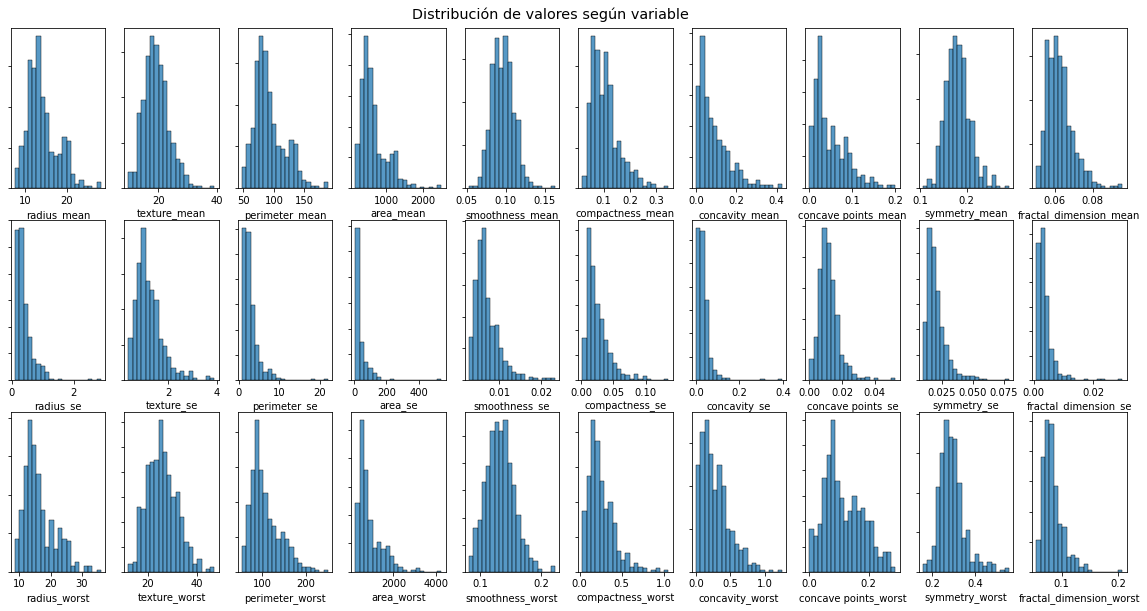

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20,10))

for i, column in enumerate(X_train.columns):

  sns.histplot(X_train[column],ax=axes[i//10,i%10], bins = 20).set(yticklabels=[], ylabel=None)

plt.suptitle('Distribución de valores según variable', fontsize = 'x-large', y = 0.91)

## Pre-procesamiento de los datos

In [14]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [15]:
le = LabelEncoder().fit(y_train)

y_train = le.transform(y_train)

y_test = le.transform(y_test)

In [39]:
# Creo el dataframe para recopilar los resultados de los modelos.

resultados_df = pd.DataFrame(columns = ['modelo', 'f1'])

## Clasificadores

### KNN

In [40]:
parametros_knn = {'n_neighbors': [3,5,10,15,20,30], 'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()

clf_knn = GridSearchCV(knn, parametros_knn)

clf_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15, 20, 30],
                         'weights': ['uniform', 'distance']})

In [43]:
resultados_knn = pd.DataFrame()

resultados_knn['k'] = clf_knn.cv_results_['param_n_neighbors'].data

resultados_knn['weight'] = clf_knn.cv_results_['param_weights'].data

resultados_knn['score'] = clf_knn.cv_results_['mean_test_score']

Teniendo en cuenta los resultados, elijo k = 10 y weight = 'distance'.

In [44]:
resultados_knn.sort_values('score', ascending = False)

,k,weight,score
9,20,distance,0.960440
5,10,distance,0.960440
0,3,uniform,0.958242
1,3,distance,0.958242
2,5,uniform,0.958242
3,5,distance,0.958242
8,20,uniform,0.956044
6,15,uniform,0.956044
7,15,distance,0.956044
4,10,uniform,0.953846


In [45]:
modelo_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

modelo_knn.fit(X_train, y_train)

predicciones_knn = modelo_knn.predict(X_test)

In [46]:
print(classification_report(y_test, predicciones_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [47]:
resultados_df = resultados_df.append({'modelo': 'knn', 'f1': classification_report(y_test, predicciones_knn, output_dict = True)['accuracy']}, ignore_index = True)

### Clasificación Bayesiana

In [48]:
modelo_nb = MultinomialNB()

modelo_nb.fit(X_train, y_train)

predicciones_nb = modelo_nb.predict(X_test)

In [49]:
print(classification_report(y_test, predicciones_nb))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        74
           1       1.00      0.55      0.71        40

    accuracy                           0.84       114
   macro avg       0.90      0.78      0.80       114
weighted avg       0.87      0.84      0.83       114



In [50]:
resultados_df = resultados_df.append({'modelo': 'nb', 'f1': classification_report(y_test, predicciones_nb, output_dict = True)['accuracy']}, ignore_index = True)

### Regresión Logística

In [51]:
modelo_lr = LogisticRegression()

modelo_lr.fit(X_train, y_train)

predicciones_lr = modelo_lr.predict(X_test)

In [52]:
print(classification_report(y_test, predicciones_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [53]:
resultados_df = resultados_df.append({'modelo': 'lr', 'f1': classification_report(y_test, predicciones_lr, output_dict = True)['accuracy']}, ignore_index = True)

### Random Forest

In [54]:
parametros_rfc = {'n_estimators': [10,30,50,100,200]}

rfc = RandomForestClassifier()

clf_rfc = GridSearchCV(rfc, parametros_rfc)

clf_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 30, 50, 100, 200]})

In [55]:
resultados_rfc = pd.DataFrame()

resultados_rfc['n'] = clf_rfc.cv_results_['param_n_estimators'].data

resultados_rfc['score'] = clf_rfc.cv_results_['mean_test_score']

Los mejores resultados se obtuvieron con n = 200.



In [56]:
resultados_rfc.sort_values('score', ascending = False)

,n,score
4,200,0.958242
0,10,0.956044
2,50,0.956044
1,30,0.953846
3,100,0.953846


In [57]:
modelo_rfc = RandomForestClassifier(n_estimators = 200)

modelo_rfc.fit(X_train, y_train)

predicciones_rfc = modelo_rfc.predict(X_test)

In [58]:
print(classification_report(y_test, predicciones_rfc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [59]:
resultados_df = resultados_df.append({'modelo': 'rfc', 'f1': classification_report(y_test, predicciones_rfc, output_dict = True)['accuracy']}, ignore_index = True)

### Support Vector Machines

In [60]:
parametros_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm = SVC()

clf_svm = GridSearchCV(svm, parametros_svm)

clf_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [61]:
resultados_svm  = pd.DataFrame()

resultados_svm['kernel'] = clf_svm.cv_results_['param_kernel'].data

resultados_svm['score'] = clf_svm.cv_results_['mean_test_score']

Los mejores resultados se obtuvieron con el kernel linear.

In [62]:
resultados_svm.sort_values('score', ascending = False)

,kernel,score
0,linear,0.969231
2,rbf,0.967033
1,poly,0.964835
3,sigmoid,0.301099


In [63]:
modelo_svm = SVC(kernel = 'linear')

modelo_svm.fit(X_train, y_train)

predicciones_svm = modelo_svm.predict(X_test)

In [64]:
print(classification_report(y_test, predicciones_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [65]:
resultados_df = resultados_df.append({'modelo': 'svm', 'f1': classification_report(y_test, predicciones_svm, output_dict = True)['accuracy']}, ignore_index = True)

### Perceptrones

In [66]:
parametros_mlp = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'hidden_layer_sizes': [(10,),(20,),(50,),(100,)],
                  'max_iter': [200,300]}

mlp = MLPClassifier()

clf_mlp = GridSearchCV(mlp, parametros_mlp)

clf_mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10,), (20,), (50,), (100,)],
                         'max_iter': [200, 300],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [67]:
resultados_mlp  = pd.DataFrame()

resultados_mlp['activation'] = clf_mlp.cv_results_['param_activation'].data

resultados_mlp['solver'] = clf_mlp.cv_results_['param_solver'].data

resultados_mlp['hidden_layer_sizes'] = clf_mlp.cv_results_['param_hidden_layer_sizes'].data

resultados_mlp['max_iter'] = clf_mlp.cv_results_['param_max_iter'].data

resultados_mlp['score'] = clf_mlp.cv_results_['mean_test_score']

Los mejores resultados se obtuvieron con activation = relu, solver = adam, 50 hidden layers y 300 max iter.

In [68]:
resultados_mlp.sort_values('score', ascending = False)

,activation,solver,hidden_layer_sizes,max_iter,score
89,relu,adam,"(50,)",300,0.978022
68,tanh,adam,"(100,)",200,0.978022
95,relu,adam,"(100,)",300,0.975824
71,tanh,adam,"(100,)",300,0.975824
14,identity,adam,"(50,)",200,0.973626
...,...,...,...,...,...
28,logistic,sgd,"(10,)",300,0.621978
43,logistic,sgd,"(100,)",200,0.621978
25,logistic,sgd,"(10,)",200,0.621978
46,logistic,sgd,"(100,)",300,0.621978


In [70]:
modelo_mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (50,))

modelo_mlp.fit(X_train, y_train)

predicciones_mlp = modelo_mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [71]:
print(classification_report(y_test, predicciones_mlp))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [72]:
resultados_df = resultados_df.append({'modelo': 'mlp', 'f1': classification_report(y_test, predicciones_mlp, output_dict = True)['accuracy']}, ignore_index = True)

## Comparación de Resultados

A excepción del modelo bayesiano, todos los clasificadores alcanzaron una performance muy alta (con un valor de f1 mayor a 0,95). El modelo con el mejor resultado fue el Random Forest (f1 de 0,98).

In [74]:
resultados_df.sort_values('f1', ascending = False)

,modelo,f1
3,rfc,0.982456
5,mlp,0.973684
0,knn,0.964912
2,lr,0.964912
4,svm,0.964912
1,nb,0.842105
